<a href="https://colab.research.google.com/github/Ebasurtos/Computer-Vision/blob/main/asesoriaLab1_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Asesoria del laboratorio 01 - Visión Computacional**
Autor: Zoser S. Quenaya Hinojosa


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## **Detección de bordes**

A partir de la siguiente imagen de una radiografía, aplicar técnicas de preprocesamiento y detección de bordes para resaltar las estructuras óseas.

### 1.- Cargar de imagen y visualización en el formato escala de grices.

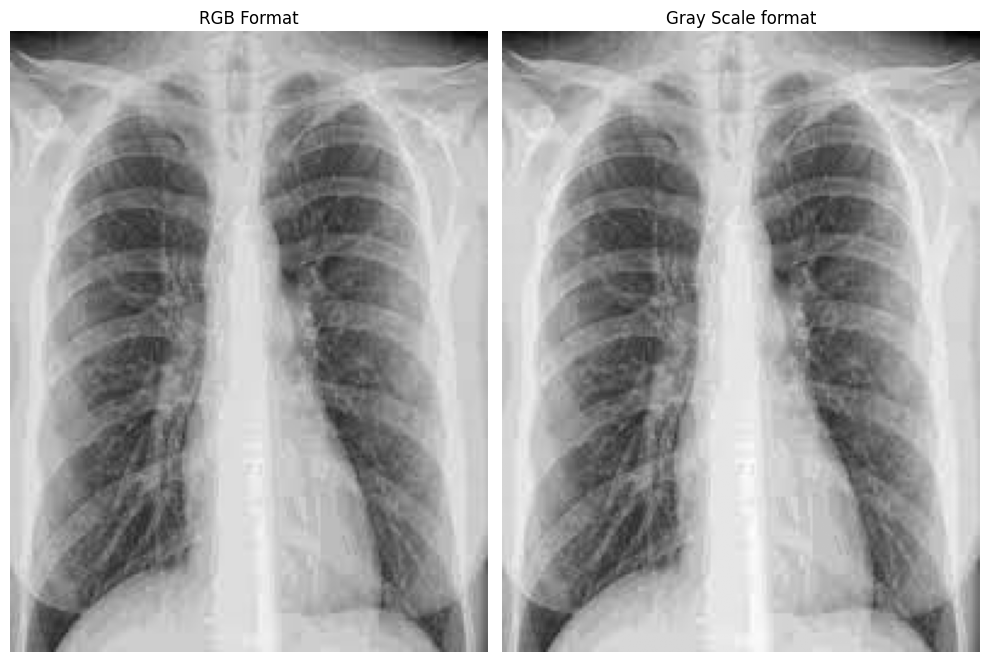

In [16]:
img_bgr = cv2.imread('/content/Copia de imagen_ejercicio_2.jpg')  # Reemplaza con la ruta correcta
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img_bgr, cmap='brg')
axs[0].set_title("RGB Format")
axs[0].axis('off')

axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title("Gray Scale format")
axs[1].axis('off')

plt.tight_layout()
plt.show()

### 2.- Prepocesamiento: Filtros para reducción de ruido (media, mediana o gaussiano).

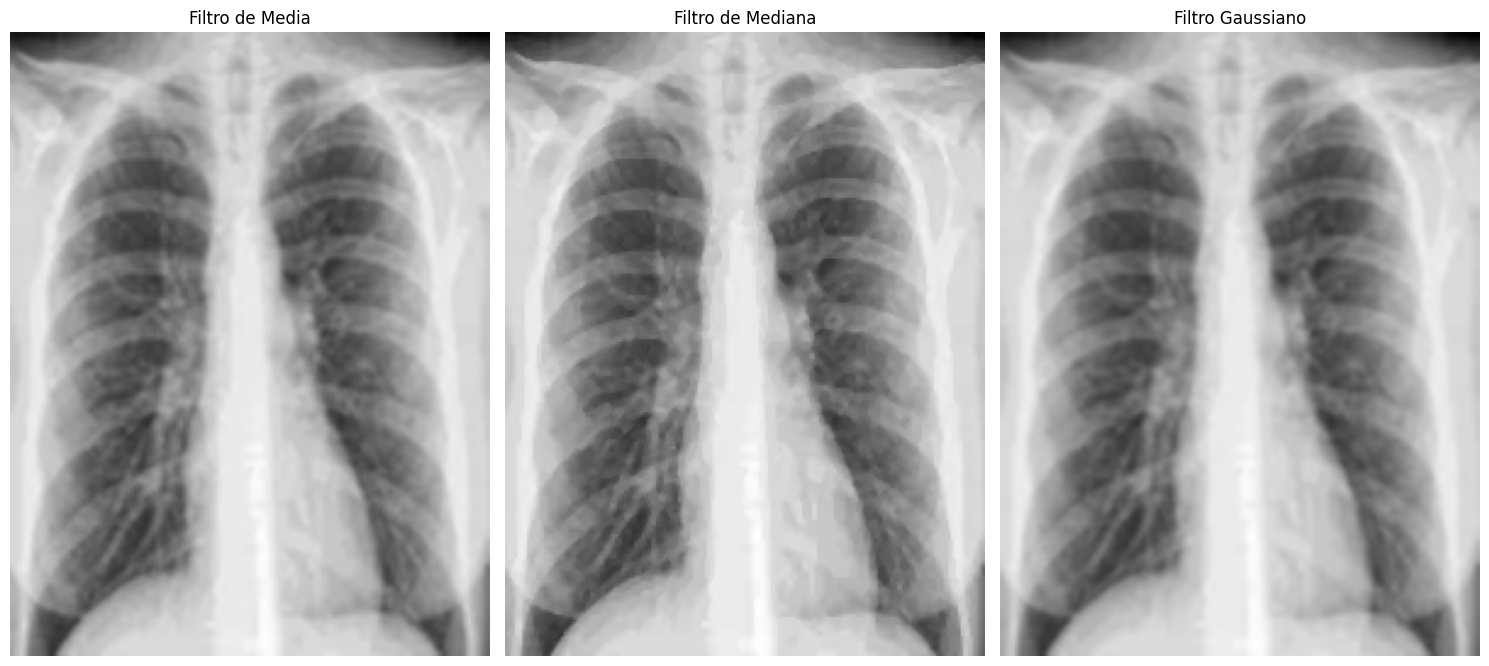

In [17]:
# Filtro de Media
img_media = cv2.blur(img_gray, (3, 3))

# Filtro de Mediana
img_mediana = cv2.medianBlur(img_gray, 3)

# Filtro Gaussiano
img_gauss = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Visualización de la imagen mejorada con los filtros de reducción de ruido.
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(img_media, cmap='gray')
axs[0].set_title("Filtro de Media")
axs[0].axis('off')

axs[1].imshow(img_mediana, cmap='gray')
axs[1].set_title("Filtro de Mediana")
axs[1].axis('off')

axs[2].imshow(img_gauss, cmap='gray')
axs[2].set_title("Filtro Gaussiano")
axs[2].axis('off')

plt.tight_layout()
plt.show()

### 3.- Detección de bordes usando filtros Sobel y Canny.

In [18]:
"""
Aplica el operador Sobel para calcular el gradiente en las direcciones x e y,
y devuelve la magnitud del gradiente.
"""
def obtener_bordes_sobel(imagen):
    sobelx = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)
    magnitud = cv2.magnitude(sobelx, sobely)

    # Normalizar y convertir a uint8
    min_magnitud = np.min(magnitud)
    max_magnitud = np.max(magnitud)
    normalized_magnitud = (magnitud - min_magnitud) / (max_magnitud - min_magnitud)
    return normalized_magnitud

"""
Aplica el detector de bordes Canny con thresholds predeterminados.
"""
def obtener_bordes_canny(imagen):
    bordes = cv2.Canny(imagen, 50, 150)
    return bordes

# Aplicar métodos de detección de bordes sobre cada imagen filtrada
# Para Filtro de Media
bordes_media_sobel = obtener_bordes_sobel(img_media)
bordes_media_canny = obtener_bordes_canny(img_media)

# Para Filtro de Mediana
bordes_mediana_sobel = obtener_bordes_sobel(img_mediana)
bordes_mediana_canny = obtener_bordes_canny(img_mediana)

# Para Filtro Gaussiano
bordes_gaussiano_sobel = obtener_bordes_sobel(img_gauss)
bordes_gaussiano_canny = obtener_bordes_canny(img_gauss)

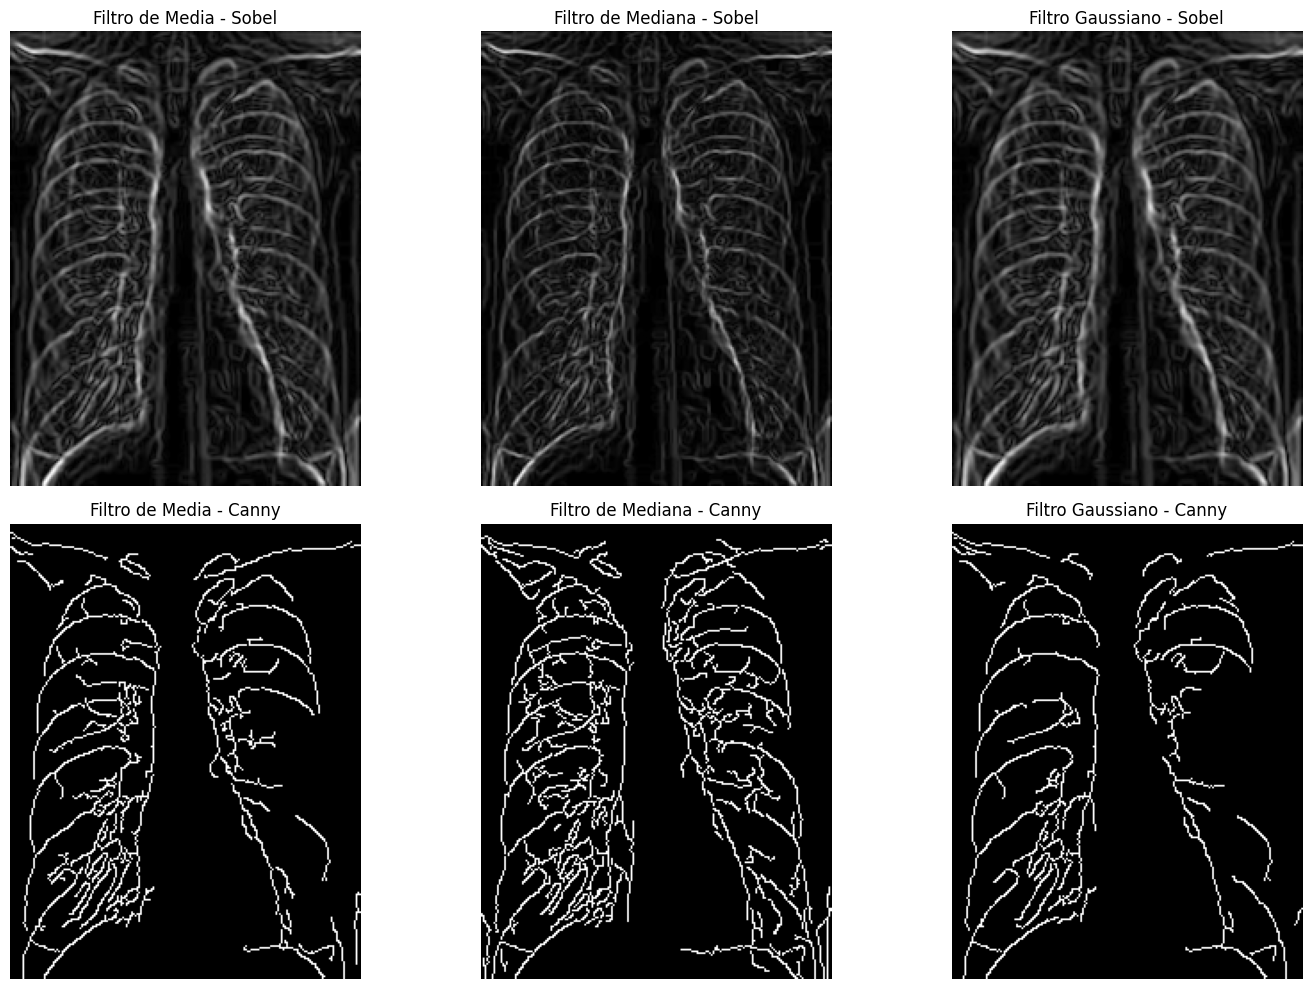

In [19]:
# Visualización de los resultados de ambas técnicas en 6 subplots (2 filas x 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Fila 1: Resultados con el operador Sobel
axs[0, 0].imshow(bordes_media_sobel, cmap='gray')
axs[0, 0].set_title("Filtro de Media - Sobel")
axs[0, 0].axis('off')

axs[0, 1].imshow(bordes_mediana_sobel, cmap='gray')
axs[0, 1].set_title("Filtro de Mediana - Sobel")
axs[0, 1].axis('off')

axs[0, 2].imshow(bordes_gaussiano_sobel, cmap='gray')
axs[0, 2].set_title("Filtro Gaussiano - Sobel")
axs[0, 2].axis('off')

# Fila 2: Resultados con el detector Canny
axs[1, 0].imshow(bordes_media_canny, cmap='gray')
axs[1, 0].set_title("Filtro de Media - Canny")
axs[1, 0].axis('off')

axs[1, 1].imshow(bordes_mediana_canny, cmap='gray')
axs[1, 1].set_title("Filtro de Mediana - Canny")
axs[1, 1].axis('off')

axs[1, 2].imshow(bordes_gaussiano_canny, cmap='gray')
axs[1, 2].set_title("Filtro Gaussiano - Canny")
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 4.- Criterio de selección y reflexión.

**Criterio de selección de filtros:**

Se probaron tres filtros de reducción de ruido: Media, Mediana y Gaussiano.

*   **Filtro de Media:** Es simple y efectivo para reducir ruido aleatorio, pero puede difuminar los bordes.
*   **Filtro de Mediana:** Es especialmente útil para eliminar ruido impulsivo (sal y pimienta) y preserva mejor los bordes que el filtro de media.
*   **Filtro Gaussiano:** Utiliza una función gaussiana para suavizar la imagen y es efectivo para reducir ruido gaussiano, manteniendo un buen equilibrio entre suavizado y preservación de bordes.

Visualizando los resultados de los filtros (en la sección 2), se observa que el **Filtro Gaussiano** proporciona un buen balance entre la reducción de ruido y la preservación de los detalles en la radiografía, lo cual es crucial para la posterior detección de bordes. El filtro de mediana también es una buena opción, pero el gaussiano parece dar una imagen ligeramente más suave sin perder información importante.

**Criterio de selección del operador de bordes:**

Se aplicaron dos operadores de detección de bordes: Sobel y Canny.

*   **Operador Sobel:** Calcula la magnitud del gradiente de intensidad, lo que resulta en bordes más gruesos y sensibles al ruido.
*   **Detector Canny:** Es un detector de bordes multi-etapa que incluye suavizado, cálculo de gradiente, supresión no máxima e histéresis. Es conocido por ser robusto, sensible a una amplia gama de bordes y por generar bordes finos y bien definidos.

Visualizando los resultados de la detección de bordes (en la sección 3), se compararon los bordes obtenidos por Sobel y Canny después de aplicar cada filtro de preprocesamiento.

**Pregunta de reflexión:**

¿Cuál operador te dio un mejor resultado? ¿Por qué?

Considerando las imágenes resultantes, el **detector Canny** dio un mejor resultado general para esta radiografía. Esto se debe a varias razones:

*   **Bordes más finos y definidos:** Canny produce bordes más delgados y precisos en comparación con Sobel, que tiende a generar bordes más gruesos. En una radiografía, bordes finos son deseables para resaltar estructuras óseas con mayor claridad.
*   **Menos sensibilidad al ruido:** Gracias a sus etapas de preprocesamiento y supresión no máxima, Canny es menos susceptible al ruido que Sobel, lo que resulta en una detección de bordes más limpia y menos "ruidosa".
*   **Detección de bordes débiles y fuertes:** El uso de histéresis en Canny permite detectar bordes débiles conectados a bordes fuertes, lo que puede ser útil para capturar detalles sutiles en la radiografía.

En conclusión, la combinación del **Filtro Gaussiano** para la reducción de ruido y el **detector Canny** para la detección de bordes parece ser la más efectiva para resaltar las estructuras óseas en esta imagen de radiografía, produciendo bordes claros y definidos con menor interferencia de ruido.